In [1]:
## 3D Visualisation

In [2]:
#------------#------------#
# Get them Libraries
#------------#------------#

import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
import time

import h5py

#------------#------------#
# Font Settings
#------------#------------#

# Set global font to Times New Roman and font size to 10pt
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 10
plot_font_size = 20

In [3]:
#------------#------------#
# File Names and Paths
#------------#------------#


# Folder Name
#xyz_folder_name = "A - 316L Rod"

# File Names
#sample_name = 'A1 Pre-Galling Test.xyz'

# Code File Location
code_dir = os.getcwd()

# Source File relative to code file
csv_path = os.path.join(code_dir, "..", "xyz Files", xyz_folder_name, sample_name)

# Replace the file extension for the output CSV file
saving_h5_name = sample_name.replace('.xyz', '_processed.h5')

# Output Folder
target_folder = xyz_folder_name

# Find the file path within the target folder
saving_h5_path = os.path.join(code_dir, "..", "Processed Files", target_folder, saving_h5_name)


In [4]:
#------------#------------#
# Profilometer Scan Parameters
#------------#------------#

%run Profilometer_Scan_Parameters.ipynb {csv_path}


Check parameter selecetion, skip_rows =  3
Edge size / mm:  0.1


In [5]:
#------------#------------#
# Load for File Visualisation
#------------#------------#

start_time = time.time()

vis_file_name = saving_h5_path

# Load data from HDF5 file
with h5py.File(vis_file_name, 'r') as f:
    X = f['X_new'][:]
    Y = f['Y_new'][:]
    pixel_size = f.attrs['pixel_size']
    data = pd.DataFrame(f['translated_data'][:])
    raw = pd.DataFrame(f['raw_data'][:])
    tilted_data = pd.DataFrame(f['tilted_data_3'][:])
    


started
contour done


KeyboardInterrupt: 

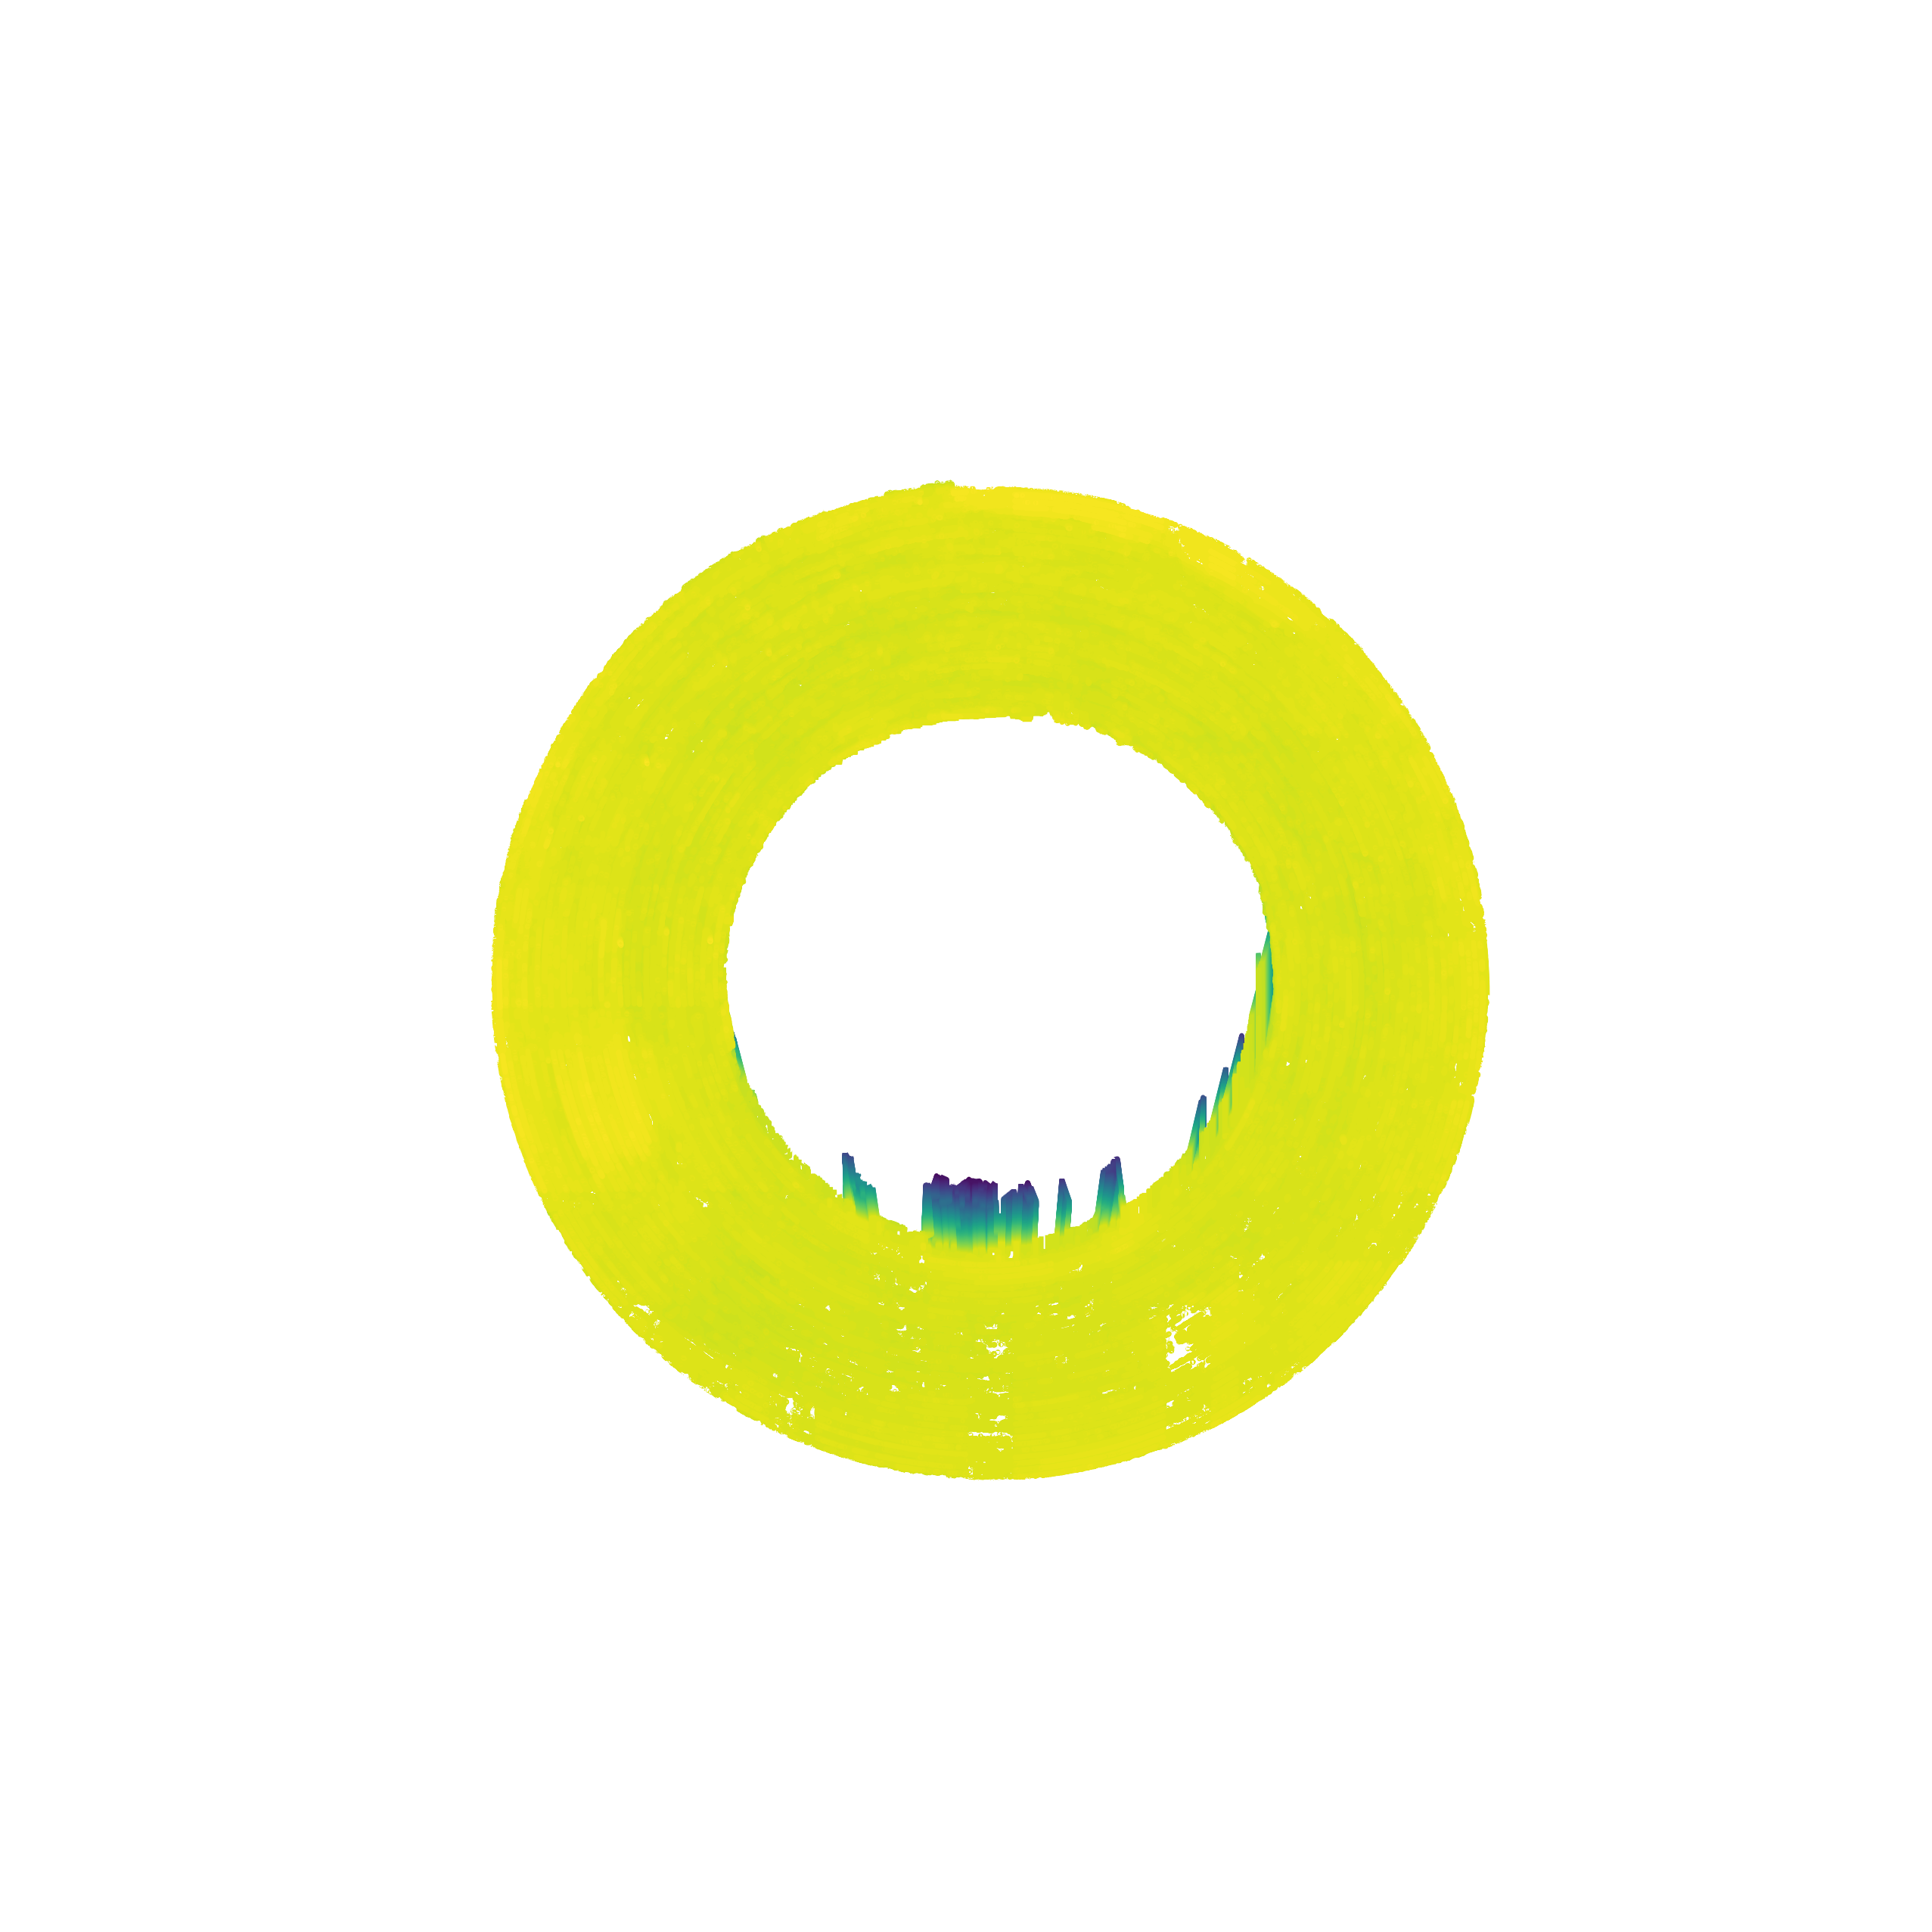

In [7]:
#------------#------------#
# 3D Spinning Gif // and saves the gif
#------------#------------#

# Start timing
start_time = time.time()

print('started')

# Set figure size to 1920x1080 resolution with 300 DPI
fig = plt.figure(figsize=(19.2, 10.8), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Parameters
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2 * np.pi, 50)
u, v = np.meshgrid(u, v)

# Create the 3D contour plot
contour = ax.contour3D(X, Y, data, 150, cmap='viridis', vmax=np.amax(data), vmin=np.amin(data))
print('contour done')
# Remove gridlines, axis, and background
ax.grid(False)
ax.set_axis_off()

# Animation function to update view angle (top-down and rotating around y-axis)
def update(frame):
    ax.view_init(elev=frame % 360, azim=0)  # Elevation fixed (side view), changing azimuth to simulate left-to-right flipping
    return fig,

# Create animation
frames = 360  # Full rotation over 360 frames
anim = FuncAnimation(fig, update, frames=frames, interval=1000/120)

# Save as GIF
output = vis_file_name.replace('.h5', '_spinning.gif')
anim.save(output, writer=PillowWriter(fps=60))

plt.show()

# End timing for the whole process
end_time = time.time()

# Print the timing results
print(f"Total execution time: {end_time - start_time:.2f} seconds")

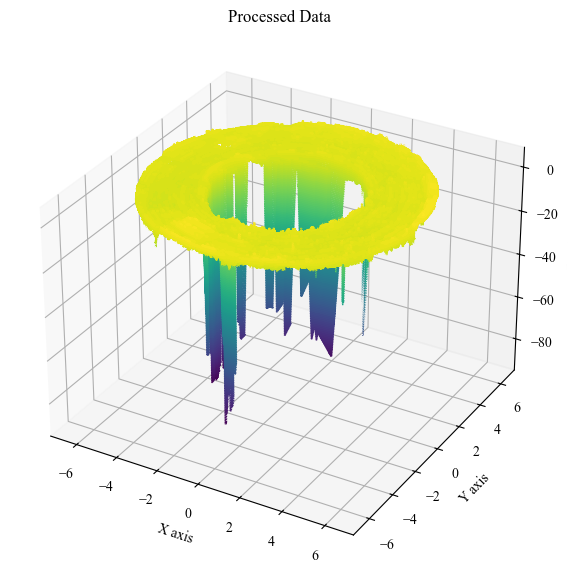

Total execution time: 13.35 seconds


In [8]:
#------------#------------#
# Creates a fun 3D plot
#------------#------------#

# Start timing
start_time = time.time()

# Create a figure and an axes for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D contour plot
contour = ax.contour3D(X, Y, data, 150, cmap='viridis', vmax=np.amax(data), vmin=np.amin(data))

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Processed Data')

# Save Image
output = vis_file_name.replace('.h5', '_3D_plot.png')
fig.savefig(output, dpi=150)

# Show the plot
plt.show()

# End timing for the whole process
end_time = time.time()

# Print the timing results
print(f"Total execution time: {end_time - start_time:.2f} seconds")